In [18]:
import pandas as pd
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [19]:
#Creating dataframe of amazon reviews from csv
df=pd.read_csv('amazon.csv')
df.columns

/home/yashraj/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [20]:
#Filtering Columns
df=df[['reviews.rating' , 'reviews.text' , 'reviews.title']]

## Inspection of Data

In [21]:
df.head()

,reviews.rating,reviews.text,reviews.title
0,5.0,This product so far has not disappointed. My c...,Kindle
1,5.0,great for beginner or experienced person. Boug...,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
reviews.rating    34627 non-null float64
reviews.text      34660 non-null object
reviews.title     34655 non-null object
dtypes: float64(1), object(2)
memory usage: 812.4+ KB


In [32]:
df.describe()

,reviews.rating
count,34627.000000
mean,4.584573
std,0.735653
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [33]:
df.shape

(34660, 3)

In [23]:
#Checking for null values
print(df.isnull().sum())

reviews.rating    33
reviews.text       0
reviews.title      5
dtype: int64


In [36]:
#removing missing values
df=df.dropna(how="any")

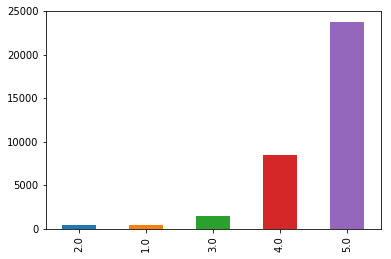

In [39]:
#ploting graph on the basis of review ratings
df["reviews.rating"].value_counts().sort_values().plot.bar()

### Above graph shows maximum reviews are positive.

In [38]:
senti= df[df["reviews.rating"].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34622 entries, 0 to 34659
Data columns (total 3 columns):
reviews.rating    34622 non-null float64
reviews.text      34622 non-null object
reviews.title     34622 non-null object
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


/home/yashraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/yashraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


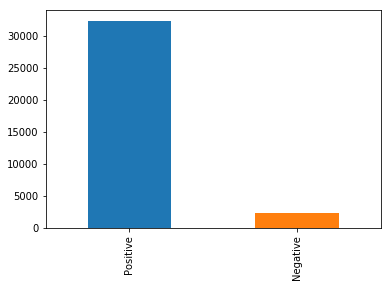

In [26]:
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["Positive" , "Negative"])
senti["senti"].value_counts().plot.bar()

# Text Processing using NLTK

In [27]:
#creating negative word list from csv
ndf=pd.read_csv("./negative.csv")
neg_words= list(ndf["words"])

In [41]:
#creating positive word list from csv
pdf=pd.read_csv("./pos.csv")
pos_words= list(pdf["words"])

### Funtion for determining the sentiment using any text as parameter

In [29]:
def sentiment(r):
    neg_no=0
    pos_no=0
    nut_no=0
    #for review in r:
    token_words=word_tokenize(r)
    token_words=[''.join(c for c in s if c not in string.punctuation)for s in token_words]
    useful_words = [word for word in token_words if word not in stopwords.words("english")]
    for w in useful_words:
        if w in neg_words:
            neg_no +=1
        elif w in pos_words:
            pos_no +=1
        else:
            nut_no +=1
    if pos_no>neg_no:
        return +1
    elif neg_no>pos_no:
        return -1
    else:
        return 0

## Analysing amazon reviews using sentiment analyzer

In [30]:
pos_review=0
neg_review=0
nut_review=0
for review in df["reviews.text"]:
    counter=sentiment(review)
    if counter==-1:
        neg_review +=1
    elif counter==1:
        pos_review +=1
    else:
        nut_review +=1
print(pos_review,neg_review,nut_review)

27555 1621 5484


([<matplotlib.patches.Wedge at 0x7fa914aa8898>,
 [Text(-0.792526,-1.05561,'Positive'),
  Text(1.65453,0.758251,'Negative'),
  Text(0.772502,1.42395,'Nutral')],
 [Text(-0.432287,-0.575785,'79.5%'),
  Text(1.10908,0.508278,'4.7%'),
  Text(0.48639,0.896563,'15.8%')])

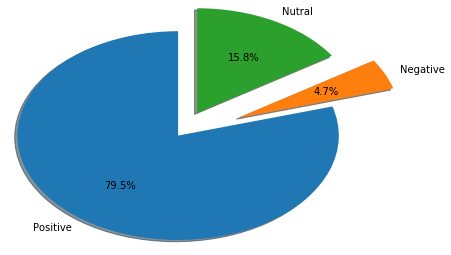

In [31]:
#ploting graph on the basis of sentiments
plt.pie([pos_review,neg_review,nut_review], labels=["Positive","Negative","Nutral"]   ,     
        startangle=90, shadow = True, explode = (0, 0.5, 0.3), 
        radius = 1.2, autopct = '%1.1f%%') 

## On the basis of above pie chart we can conclude that 79% of the customers reviews are positive,16% reviews are nutral and only 5% reviews are negative.